In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 250)

In [127]:
df = pd.read_csv('2020_11_02_COVID-19_Daily_Cases__Deaths__and_Hospitalizations.csv')

In [128]:
df.head()

,Date,Cases - Total,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,Cases - Age 70-79,Cases - Age 80+,Cases - Age Unknown,Cases - Female,Cases - Male,Cases - Unknown Gender,Cases - Latinx,Cases - Asian Non-Latinx,Cases - Black Non-Latinx,Cases - White Non-Latinx,Cases - Other Race Non-Latinx,Cases - Unknown Race/Ethnicity,Deaths - Age 0-17,Deaths - Age 18-29,Deaths - Age 30-39,Deaths - Age 40-49,Deaths - Age 50-59,Deaths - Age 60-69,Deaths - Age 70-79,Deaths - Age 80+,Deaths - Age Unknown,Deaths - Female,Deaths - Male,Deaths - Unknown Gender,Deaths - Latinx,Deaths - Asian Non-Latinx,Deaths - Black Non-Latinx,Deaths - White Non-Latinx,Deaths - Other Race Non-Latinx,Deaths - Unknown Race/Ethnicity,Hospitalizations - Age 0-17,Hospitalizations - Age 18-29,Hospitalizations - Age 30-39,Hospitalizations - Age 40-49,Hospitalizations - Age 50-59,Hospitalizations - Age 60-69,Hospitalizations - Age 70-79,Hospitalizations - Age 80+,Hospitalizations - Age Unknown,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Unknown Gender,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity
0,03/29/2020,282,20,130.0,4,29,48,54,50,50,30,17,0,128,154,0,55,11,145,38,10,23,0,1,0,1,4,4,6,4,0,3,17,0,2,2,14,2,0,0,0.0,5.0,12.0,25.0,23.0,27.0,24.0,14.0,0.0,57.0,73.0,0.0,21.0,3.0,92.0,11.0,2.0,1.0
1,03/01/2020,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,03/02/2020,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,03/03/2020,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
4,03/04/2020,0,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0


In [129]:
df.Date = pd.to_datetime(df.Date)

In [130]:
df.sort_values(by='Date', inplace=True)

In [131]:
df.set_index('Date', inplace=True)

In [160]:
df

,Cases - Total,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,Cases - Age 70-79,Cases - Age 80+,Cases - Age Unknown,Cases - Female,Cases - Male,Cases - Unknown Gender,Cases - Latinx,Cases - Asian Non-Latinx,Cases - Black Non-Latinx,Cases - White Non-Latinx,Cases - Other Race Non-Latinx,Cases - Unknown Race/Ethnicity,Deaths - Age 0-17,Deaths - Age 18-29,Deaths - Age 30-39,Deaths - Age 40-49,Deaths - Age 50-59,Deaths - Age 60-69,Deaths - Age 70-79,Deaths - Age 80+,Deaths - Age Unknown,Deaths - Female,Deaths - Male,Deaths - Unknown Gender,Deaths - Latinx,Deaths - Asian Non-Latinx,Deaths - Black Non-Latinx,Deaths - White Non-Latinx,Deaths - Other Race Non-Latinx,Deaths - Unknown Race/Ethnicity,Hospitalizations - Age 0-17,Hospitalizations - Age 18-29,Hospitalizations - Age 30-39,Hospitalizations - Age 40-49,Hospitalizations - Age 50-59,Hospitalizations - Age 60-69,Hospitalizations - Age 70-79,Hospitalizations - Age 80+,Hospitalizations - Age Unknown,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Unknown Gender,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity,cum_cases,0-17_cum_cases,18-29_cum_cases,30-39_cum_cases,40-49_cum_cases,50-59_cum_cases,60-69_cum_cases,70-79_cum_cases,Age 80+_cum_cases,Latinx_cum_cases,Asian_cum_cases,Black_cum_cases,White_cum_cases,Other_cum_cases
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-03,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-04,0,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-05,1,0,6.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2020-03-06,3,0,3.0,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4,0,0,0,2,1,1,0,0,0,0,1,2,1
2020-03-07,3,0,3.0,0,0,0,0,1,0,2,0,0,3,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,7,0,0,0,2,2,1,2,0,0,0,3,3,1
2020-03-08,3,0,9.0,0,0,1,1,0,0,1,0,0,1,2,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,2.0,1.0,3.0,2.0,0.0,3.0,6.0,0.0,2.0,0.0,5.0,2.0,0.0,0.0,10,0,0,1,3,2,1,3,0,1,0,3,5,1
2020-03-09,5,0,3.0,3,0,0,0,0,0,1,1,0,3,2,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,15,3,0,1,3,2,1,4,1,3,1,4,6,1


In [135]:
def make_line_plot(vars_list, var_labels, title, dist):
    fig, ax = plt.subplots(figsize=(15,8))
    fig.patch.set_facecolor('white')

    colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
            '#a2755e']

    var_handles = []
    for i in range(len(vars_list)):
        var_handles.append(ax.plot(df[vars_list[i]].rolling(7).mean(), color = colors[i]))

    spine_position = ['top', 'left', 'right']
    for spine in spine_position:    
        ax.spines[spine].set_color('white')

    ax.set_title(title, fontsize=14)

    ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)
    plt.show()


<ipython-input-135-8714d987556a>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


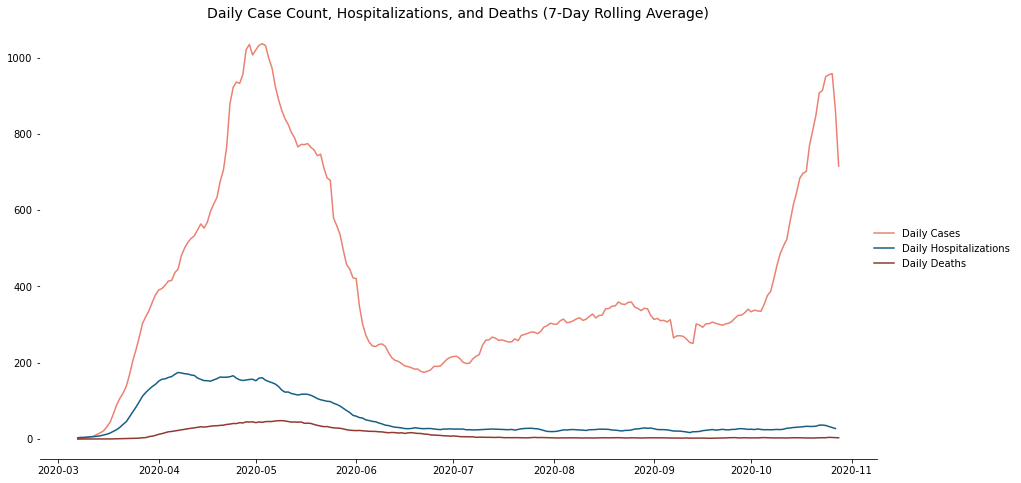

In [136]:
# Plotting cases, deaths, and hospitalizations
make_line_plot(vars_list = ['Cases - Total', 'Hospitalizations - Total', 'Deaths - Total'],
    title = 'Daily Case Count, Hospitalizations, and Deaths (7-Day Rolling Average)',
    dist = .87,
    var_labels = ['Daily Cases', 'Daily Hospitalizations', 'Daily Deaths'])


While cases spiked in the month of October, deaths and hospitalizations remained relatively low in Chicago. This could imply that hospitals are more equipped to handle the virus than previously.

## Daily Cases

<ipython-input-135-8714d987556a>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


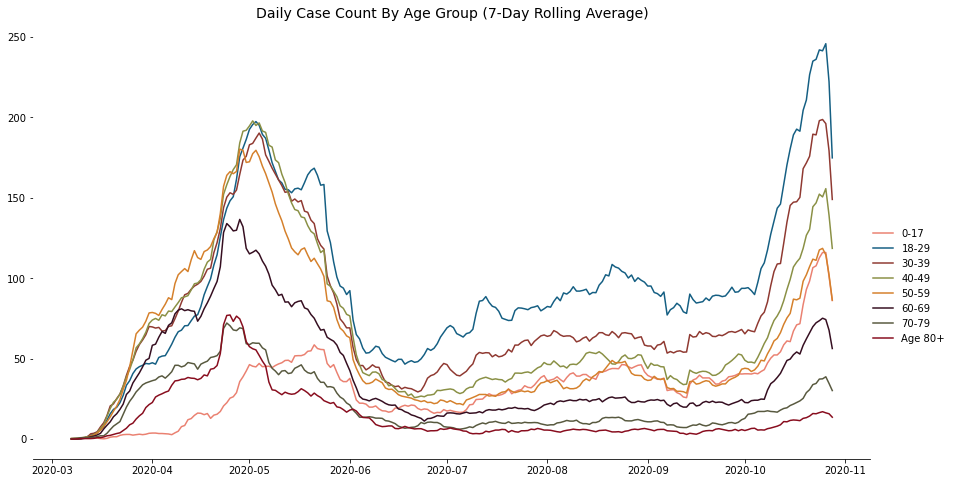

In [137]:
# Plotting cases by age group
make_line_plot(vars_list = list(df.columns[3:11]),
    title = 'Daily Case Count By Age Group (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])


In the chart above, we can see that all throughout the summer and fall, individuals netween the ages of 18 and 29 have led the city in positive cases. This is likely the result of individuals in this age group being both more risky, but also more likely to be tested than older individuals.

<ipython-input-135-8714d987556a>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


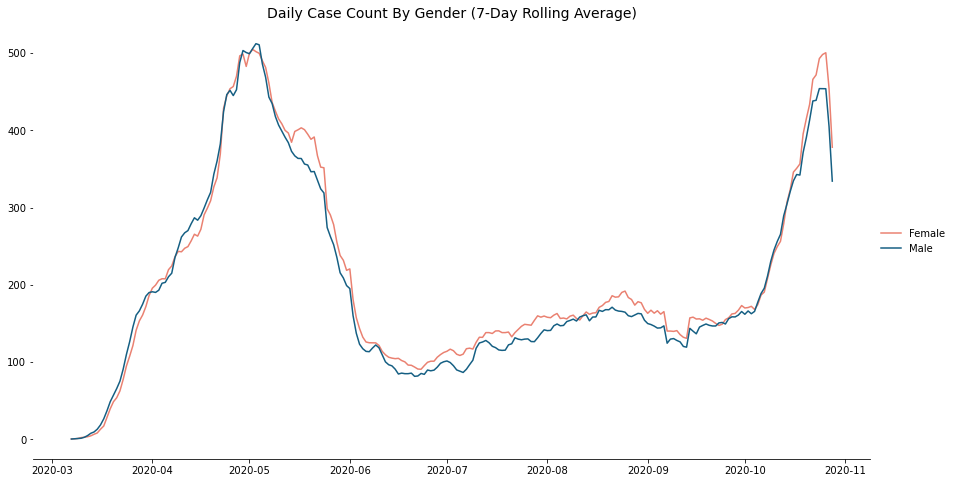

In [138]:
# Plotting cases by gender
make_line_plot(vars_list = list(df.columns[12:14]),
    title = 'Daily Case Count By Gender (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Female', 'Male'])


Males and females test positivie for the virus at similar rates.

<ipython-input-135-8714d987556a>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


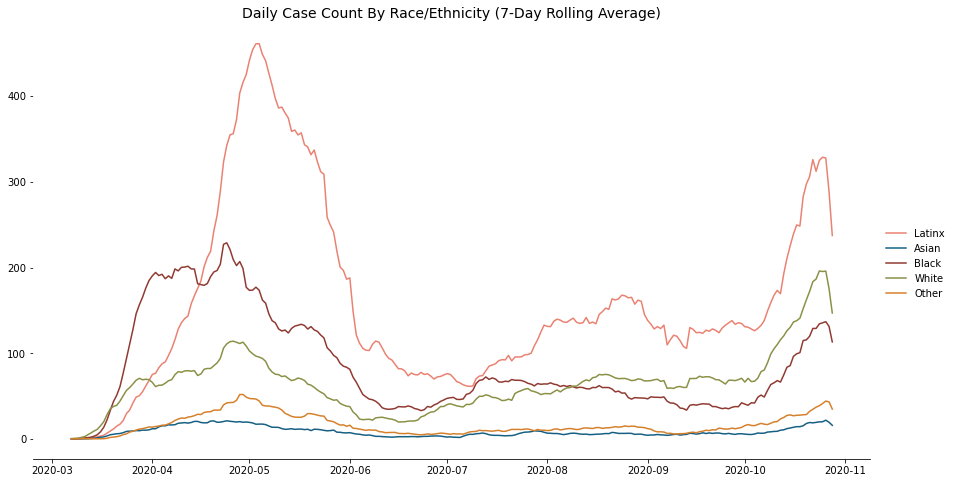

In [141]:
# Plotting cases by race/ethnicity
make_line_plot(vars_list = list(df.columns[15:20]),
    title = 'Daily Case Count By Race/Ethnicity (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

Latinx individuals lead others in Covid-19 positivity.

## Daily Deaths from Covid-19

<ipython-input-135-8714d987556a>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


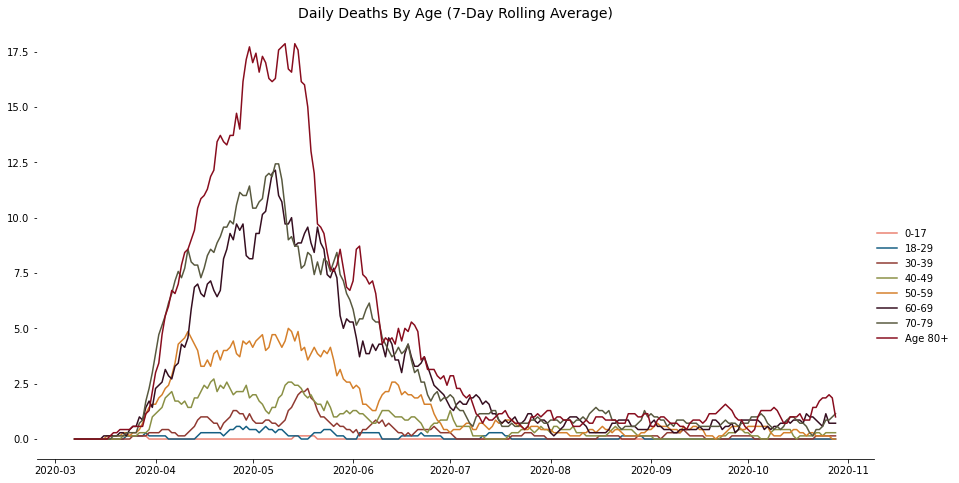

In [142]:
# Plotting cases by Age
make_line_plot(vars_list = list(df.columns[21:29]),
    title = 'Daily Deaths By Age (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

Individuals above 80 continue to be most affected by the virus, followed by individuals in their 60s and 40s.

<ipython-input-135-8714d987556a>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


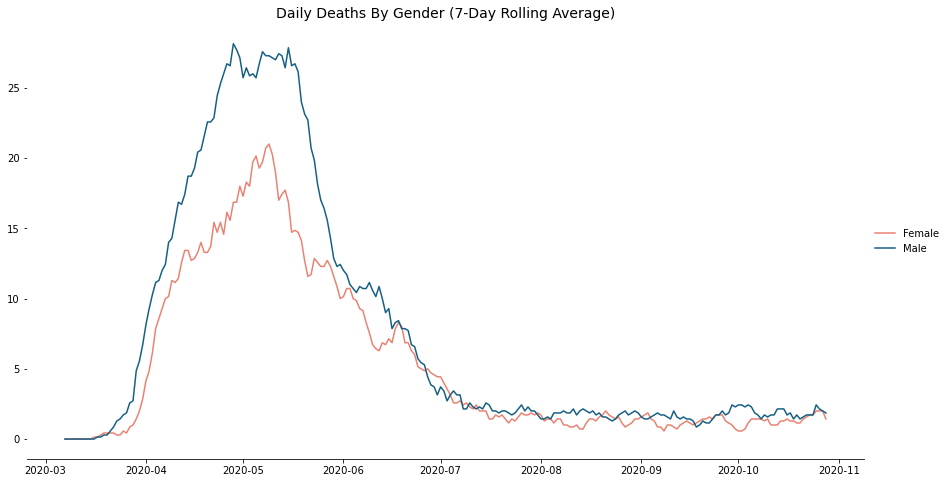

In [143]:
# Plotting deaths by gender
make_line_plot(vars_list = list(df.columns[30:32]),
    title = 'Daily Deaths By Gender (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Female', 'Male'])

<ipython-input-135-8714d987556a>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


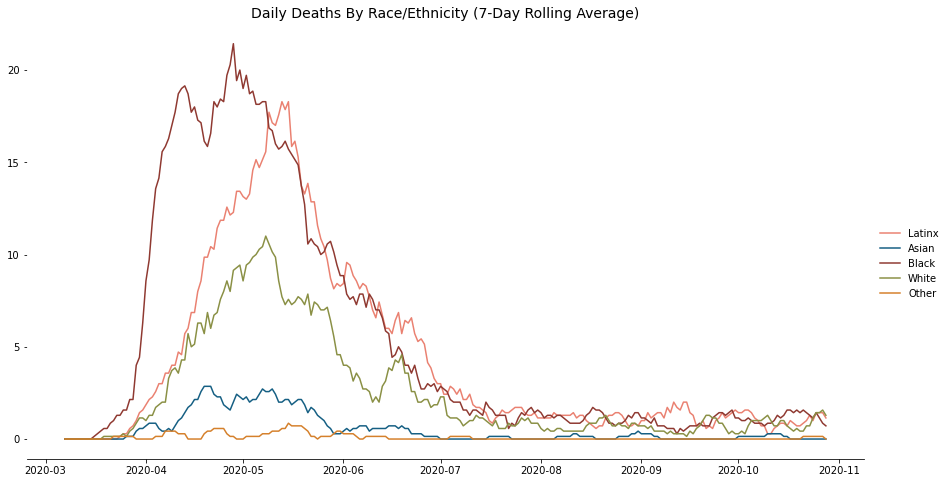

In [144]:
# Plotting cases by race/ethnicity
make_line_plot(vars_list = list(df.columns[33:38]),
    title = 'Daily Deaths By Race/Ethnicity (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

Daily deaths in the city are substantially lower than they were in March with no indication of an upward tick in deaths.

## Daily Hospitalizations from Covid-19

<ipython-input-135-8714d987556a>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


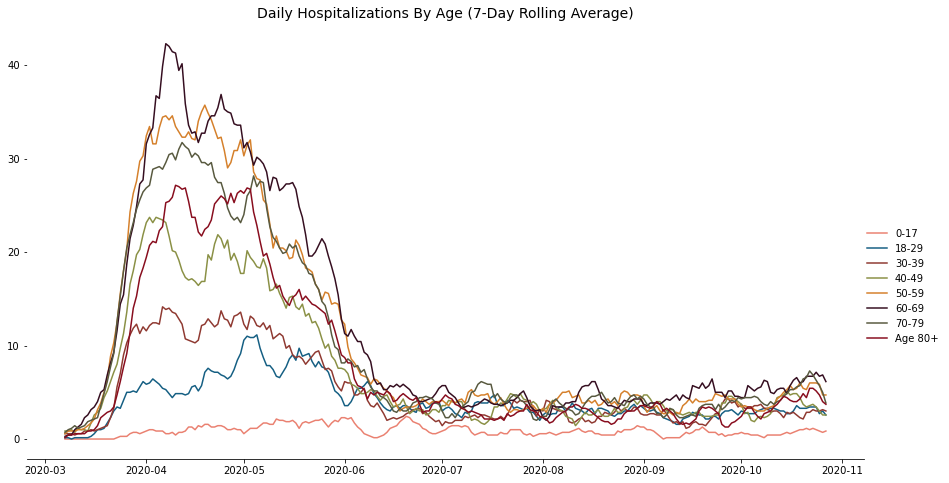

In [145]:
# Plotting cases by Age
make_line_plot(vars_list = list(df.columns[39:47]),
    title = 'Daily Hospitalizations By Age (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

<ipython-input-135-8714d987556a>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


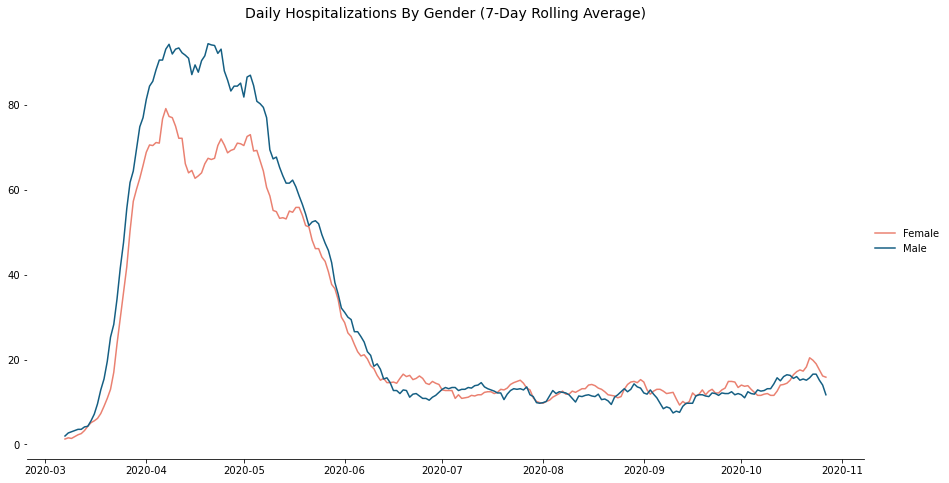

In [146]:
# Plotting hospitalizations by gender
make_line_plot(vars_list = list(df.columns[48:50]),
    title = 'Daily Hospitalizations By Gender (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Female', 'Male'])

<ipython-input-135-8714d987556a>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


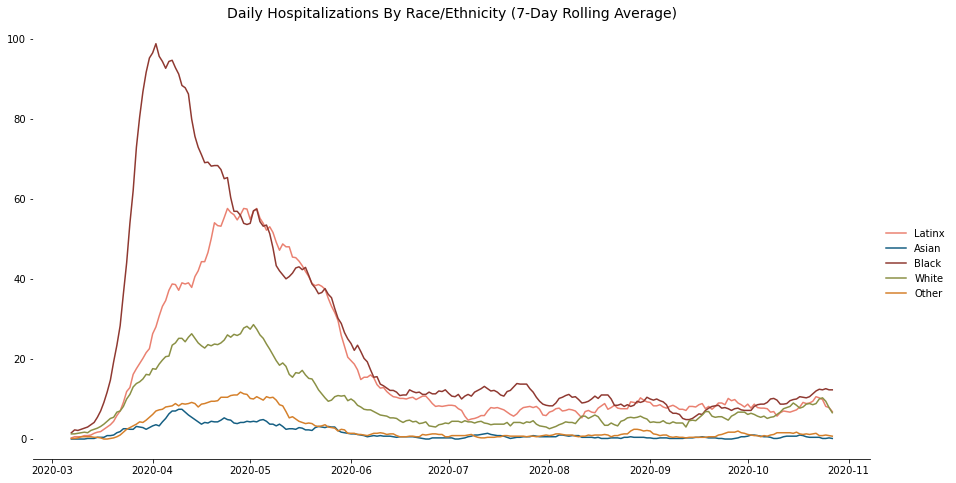

In [147]:
# Plotting hospitalizations by race/ethnicity
make_line_plot(vars_list = list(df.columns[51:-1]),
    title = 'Daily Hospitalizations By Race/Ethnicity (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

# Cumulative Case Count

In [148]:
# Making cumulative case count for total
def cum_count(series):
    output = []
    for i in range(len(series)):
        if i == 0:
            output.append(series[0])
        else:
            output.append(series[i]+output[i-1])
    return output

df['cum_cases'] = cum_count(df['Cases - Total'])

In [149]:
# Making cumulative case counts by age
var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+']
var_loc = np.arange(3,11,1)
for i in range(len(var_loc)):
    df['{}_cum_cases'.format(var_labels[i])] = cum_count(df.iloc[:,var_loc[i]])

In [150]:
# Making cumulative case counts by race
var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other']
var_loc = np.arange(15,20,1)
for i in range(len(var_loc)):
    df['{}_cum_cases'.format(var_labels[i])] = cum_count(df.iloc[:,var_loc[i]])

In [154]:
def line_plot_cum(vars_list, var_labels, title, dist):
    fig, ax = plt.subplots(figsize=(15,8))
    fig.patch.set_facecolor('white')

    colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
            '#a2755e']

    var_handles = []
    for i in range(len(vars_list)):
        var_handles.append(ax.plot(df[vars_list[i]], color = colors[i]))

    spine_position = ['top', 'left', 'right']
    for spine in spine_position:    
        ax.spines[spine].set_color('white')

    ax.set_title(title, fontsize=14)

    ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)
    plt.show()

In [155]:
df.head()

,Cases - Total,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,Cases - Age 70-79,Cases - Age 80+,Cases - Age Unknown,Cases - Female,Cases - Male,Cases - Unknown Gender,Cases - Latinx,Cases - Asian Non-Latinx,Cases - Black Non-Latinx,Cases - White Non-Latinx,Cases - Other Race Non-Latinx,Cases - Unknown Race/Ethnicity,Deaths - Age 0-17,Deaths - Age 18-29,Deaths - Age 30-39,Deaths - Age 40-49,Deaths - Age 50-59,Deaths - Age 60-69,Deaths - Age 70-79,Deaths - Age 80+,Deaths - Age Unknown,Deaths - Female,Deaths - Male,Deaths - Unknown Gender,Deaths - Latinx,Deaths - Asian Non-Latinx,Deaths - Black Non-Latinx,Deaths - White Non-Latinx,Deaths - Other Race Non-Latinx,Deaths - Unknown Race/Ethnicity,Hospitalizations - Age 0-17,Hospitalizations - Age 18-29,Hospitalizations - Age 30-39,Hospitalizations - Age 40-49,Hospitalizations - Age 50-59,Hospitalizations - Age 60-69,Hospitalizations - Age 70-79,Hospitalizations - Age 80+,Hospitalizations - Age Unknown,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Unknown Gender,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity,cum_cases,0-17_cum_cases,18-29_cum_cases,30-39_cum_cases,40-49_cum_cases,50-59_cum_cases,60-69_cum_cases,70-79_cum_cases,Age 80+_cum_cases,Latinx_cum_cases,Asian_cum_cases,Black_cum_cases,White_cum_cases,Other_cum_cases
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-03,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-04,0,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-05,1,0,6.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


<ipython-input-154-4b5724dee2c6>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


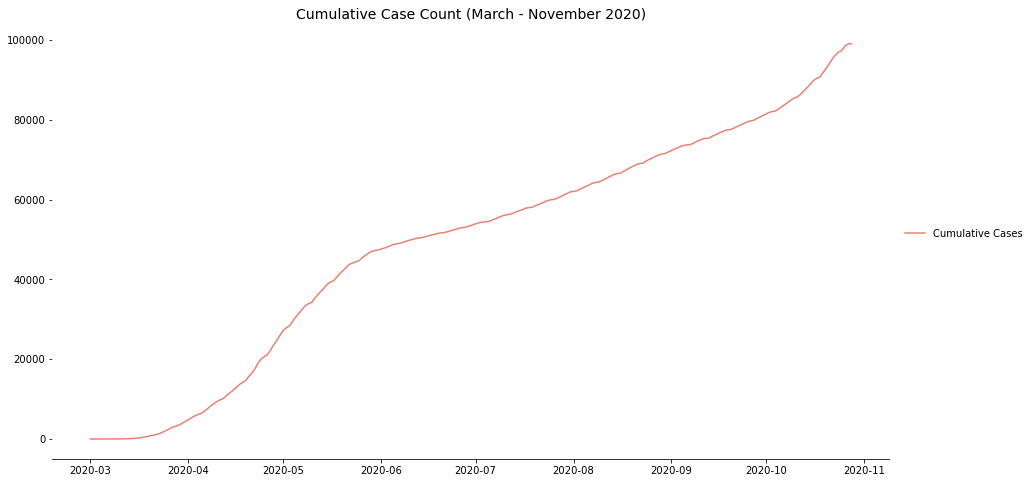

In [156]:
# plotting cumulative cases overall
line_plot_cum(vars_list = ['cum_cases'],
    title = 'Cumulative Case Count (March - November 2020)',
    dist = .87,
    var_labels = ['Cumulative Cases'])

<ipython-input-154-4b5724dee2c6>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


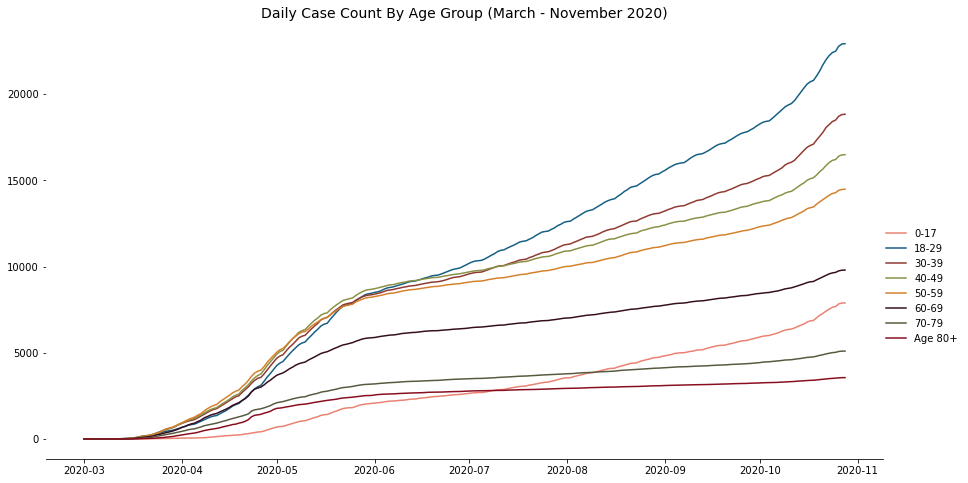

In [157]:
# Plotting cumulative cases by age
line_plot_cum(vars_list = list(df.columns[-13:-5]),
    title = 'Daily Case Count By Age Group (March - November 2020)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

<ipython-input-135-8714d987556a>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


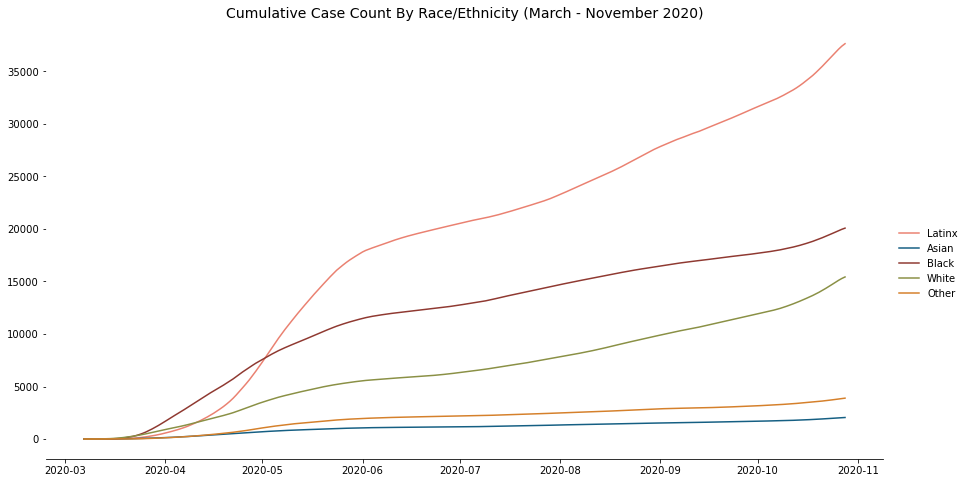

In [158]:
# Plotting cumulative cases by race/ethnicity
make_line_plot(vars_list = list(df.columns[-5:]),
    title = 'Cumulative Case Count By Race/Ethnicity (March - November 2020)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

## Time-Series Modeling

In [159]:
df.shape

(243, 71)

In [164]:
# Create Training and Test set
train = df['Cases - Total'][:228]
test = df['Cases - Total'][228:-1]

## ARIMA Model

In [73]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model1 = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

model1.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2957.820, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2999.136, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2998.296, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2979.379, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2997.231, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2936.961, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2965.725, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2938.658, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2943.108, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2942.005, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2963.261, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2936.130, Time=0.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2904.232, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2890.271, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1434.907
Date:                Mon, 02 Nov 2020   AIC                           2881.814
Time:                        21:30:10   BIC                           2902.364
Sample:                             0   HQIC                          2890.106
                                - 228                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2433      0.023     53.684      0.000       1.198       1.289
ar.L2         -0.9608      0.020    -47.231      0.000      -1.001      -0.921
ma.L1         -1.8871      0.074    -25.638      0.000      -2.031      -1.743
ma.L2          1.6082      0.116     13.826      0.000       1.380       1.836
ma.L3         -0.4861      0.071     -6.877      0.000      -0.625      -0.348
sigma2      1.786e+04   1272.309     14.040      0.000    1.54e+04    2.04e+04
===================================================================================
Ljung-Box (Q):                      522.60   Jarque-Bera (JB):                33.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

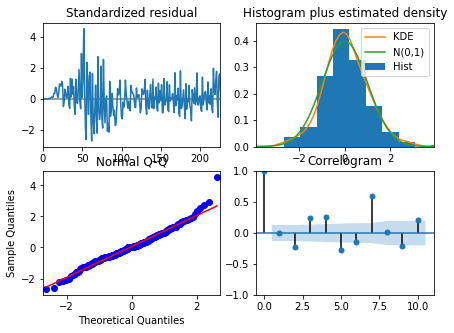

In [74]:
# Residual Diagnostics
model1.plot_diagnostics(figsize=(7,5))
plt.show()

In [75]:
# Forecast
n_periods = 14
fc, confint = model1.predict(n_periods=n_periods, return_conf_int=True)

# make series for plotting purpose
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(confint[:, 0], index=test.index)
upper_series = pd.Series(confint[:, 1], index=test.index)

In [185]:
def forecast_plot(vars_list, var_labels, title, dist, min):
    fig, ax = plt.subplots(figsize=(15,8))
    fig.patch.set_facecolor('white')

    colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
            '#a2755e']

    var_handles = []
    for i in range(len(vars_list)):
        var_handles.append(ax.plot(vars_list[i], color = colors[i]))

    ax.fill_between(lower_series.index, 
                 min, 
                 upper_series, 
                 color='k', alpha=.05)

    spine_position = ['top', 'left', 'right']
    for spine in spine_position:    
        ax.spines[spine].set_color('white')

    ax.set_title(title, fontsize=14)

    ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)
    plt.show()


    plt.show()

<ipython-input-76-821a44c8bd1e>:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


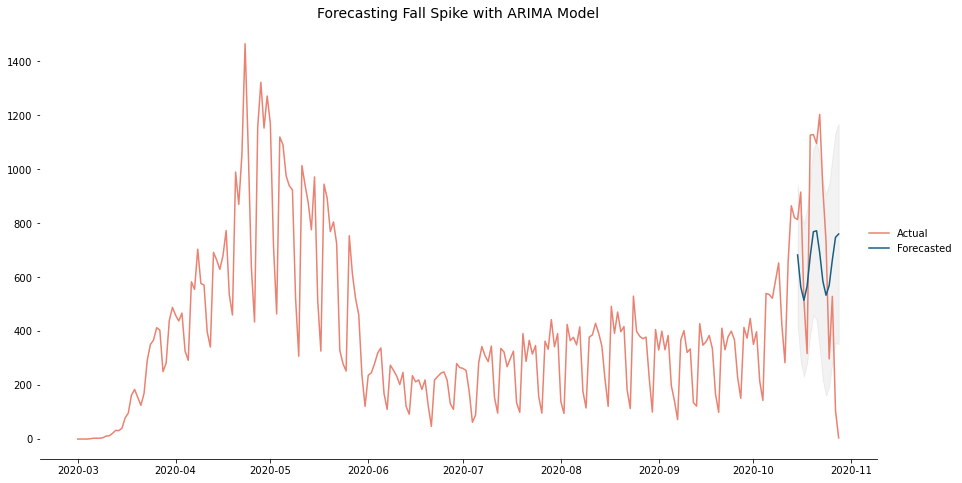

In [77]:
forecast_plot(vars_list =[df['Cases - Total'][:-1], fc_series],
                          var_labels = ['Actual', 'Forecasted'],
                          title = 'Forecasting Fall Spike with ARIMA Model',
                          dist=.8,
                          min=lower_series)

In [121]:
from statsmodels.tsa.stattools import acf
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

ValueError: operands could not be broadcast together with shapes (14,) (30,) 

## SARIMA Model

In [165]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=7,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=2676.090, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2756.083, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2710.579, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=2676.702, Time=0.09 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=2696.447, Time=0.06 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=2674.966, Time=0.30 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=2676.018, Time=0.22 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=2703.789, Time=0.23 sec
 ARIMA(2,1,1)(0,1,2)[7]             : AIC=2673.302, Time=0.44 sec
 ARIMA(2,1,1)(0,1,1)[7]             : AIC=2675.262, Time=0.17 sec
 ARIMA(2,1,1)(1,1,2)[7]             : AIC=inf, Time=0.60 sec
 ARIMA(2,1,1)(1,1,1)[7]             : AIC=inf, Time=0.44 sec
 ARIMA(2,1,0)(0,1,2)[7]             : AIC=2683.456, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  228
Model:             SARIMAX(2, 1, 2)x(0, 1, 2, 7)   Log Likelihood               -1329.602
Date:                           Tue, 03 Nov 2020   AIC                           2673.203
Time:                                   00:07:42   BIC                           2696.959
Sample:                                        0   HQIC                          2682.796
                                           - 228                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.188      4.909      0.000       0.555       1.294
ar.L2         -0.3488      0.078     -4.485      0.000      -0.501      -0.196
ma.L1         -1.4412      0.189     -7.641      0.000      -1.811      -1.072
ma.L2          0.6416      0.133      4.834      0.000       0.381       0.902
ma.S.L7       -0.4273      0.061     -7.002      0.000      -0.547      -0.308
ma.S.L14      -0.1396      0.068     -2.067      0.039      -0.272      -0.007
sigma2      1.028e+04    490.983     20.940      0.000    9318.659    1.12e+04
===================================================================================
Ljung-Box (Q):                       35.99   Jarque-Bera (JB):               701.83
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

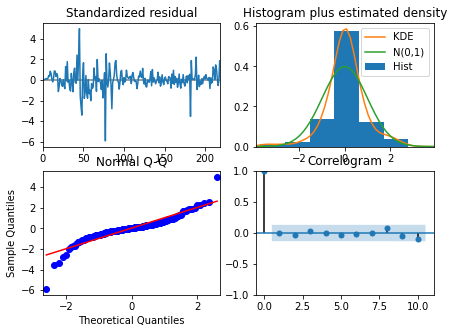

In [80]:
# Residual Diagnostics
smodel.plot_diagnostics(figsize=(7,5))
plt.show()

<ipython-input-76-821a44c8bd1e>:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


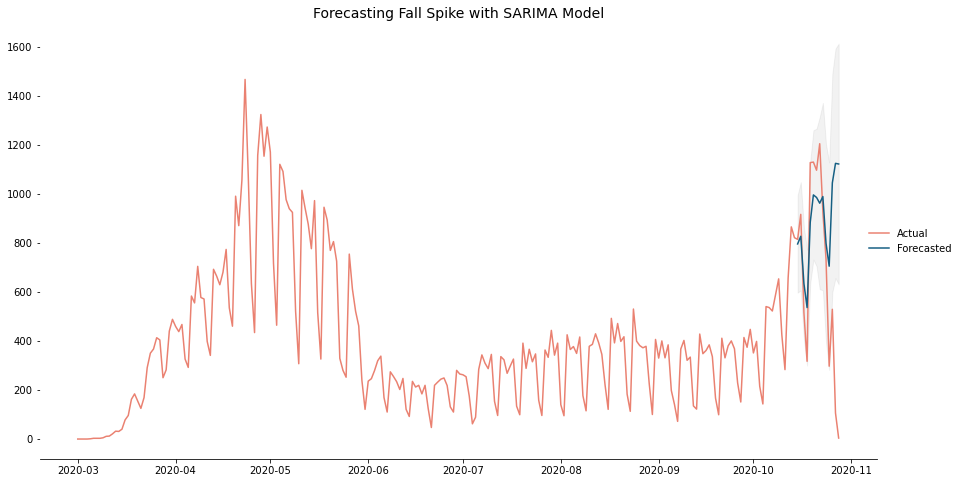

In [125]:
# Forecast
n_periods = 14
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = test.index

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

forecast_plot(vars_list =[df['Cases - Total'][:-1], fitted_series],
                          var_labels = ['Actual', 'Forecasted'],
                          title = 'Forecasting Fall Spike with SARIMA Model',
                          dist=.8,
                          min=lower_series)

In [126]:
forecast_accuracy(fitted, test.values)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 20.936816210422148,
 'me': 191.61719956078895,
 'mae': 311.4596354115252,
 'mpe': 20.828558437068473,
 'rmse': 458.4774851662006,
 'acf1': 0.6524949437078108,
 'corr': 0.04479502363043259,
 'minmax': 0.3193172954111435}

## SARIMA Model predicting one month

In [172]:
# Create Training and Test set
train = df['Cases - Total'][:213]
test = df['Cases - Total'][213:]

In [208]:
# Seasonal - fit stepwise auto-ARIMA
smodel_onemo = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_d = 3, max_q=3, m=7,
                         max_P=3, max_D=3, max_Q=3,
                         start_P=0, seasonal=True,
                         d=None, D=None, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_onemo.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=2662.371, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2801.105, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2615.660, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2673.812, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2799.126, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=2800.101, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=2608.593, Time=0.28 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=2608.175, Time=0.51 sec
 ARIMA(1,1,0)(3,0,1)[7] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(3,0,0)[7] intercept   : AIC=2630.308, Time=0.50 sec
 ARIMA(2,1,0)(3,0,0)[7] intercept   : AIC=2590.196, Time=0.51 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=2591.662, Time=0.25 sec
 ARIMA(2,1,0)(3,0,1)[7] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  213
Model:             SARIMAX(2, 1, 1)x(3, 0, [], 7)   Log Likelihood               -1280.406
Date:                            Tue, 03 Nov 2020   AIC                           2576.812
Time:                                    01:13:53   BIC                           2603.665
Sample:                                         0   HQIC                          2587.665
                                            - 213                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5104      2.771      0.184      0.854      -4.920       5.941
ar.L1          0.1202      0.077      1.571      0.116      -0.030       0.270
ar.L2         -0.1347      0.064     -2.121      0.034      -0.259      -0.010
ma.L1         -0.6539      0.066     -9.915      0.000      -0.783      -0.525
ar.S.L7        0.5988      0.053     11.213      0.000       0.494       0.703
ar.S.L14       0.0787      0.072      1.086      0.277      -0.063       0.221
ar.S.L21       0.1309      0.075      1.744      0.081      -0.016       0.278
sigma2          1e+04    498.919     20.046      0.000    9023.658     1.1e+04
===================================================================================
Ljung-Box (Q):                       36.24   Jarque-Bera (JB):               565.65
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

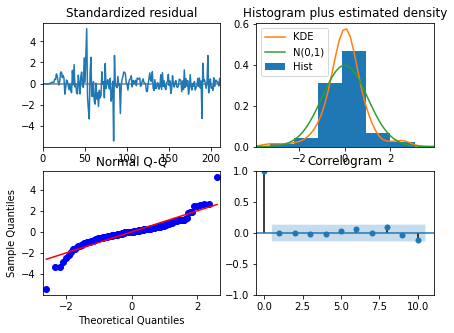

In [195]:
# Residual Diagnostics
smodel_onemo.plot_diagnostics(figsize=(7,5))
plt.show()

<ipython-input-185-5f04d630510d>:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


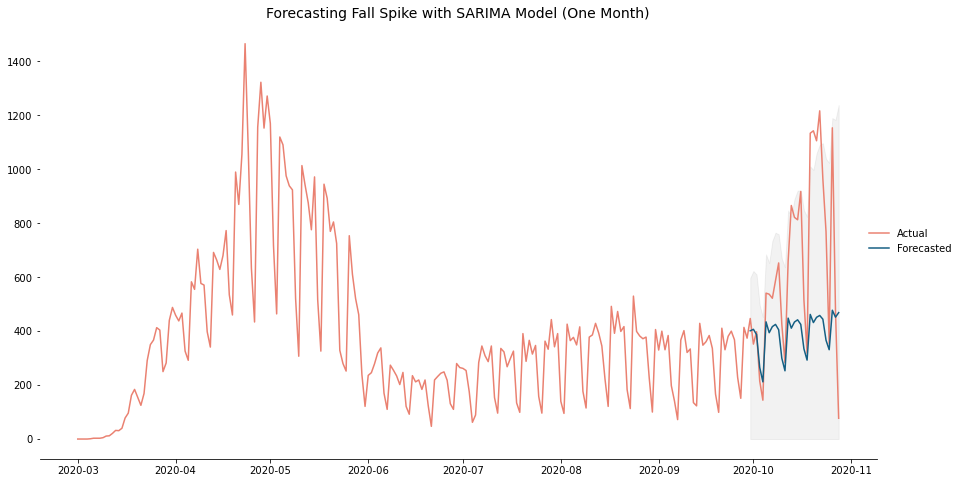

In [196]:
# Forecast
n_periods = 30
one_mo_fit, confint = smodel_onemo.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = test.index

# make series for plotting purpose
fitted_series = pd.Series(one_mo_fit, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

forecast_plot(vars_list =[df['Cases - Total'][:-1], fitted_series],
                          var_labels = ['Actual', 'Forecasted'],
                          title = 'Forecasting Fall Spike with SARIMA Model (One Month)',
                          dist=.8,
                          min=0)

In [197]:
forecast_accuracy(one_mo_fit, test.values)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.5524832712467194,
 'me': -222.2527857630429,
 'mae': 280.4478234068294,
 'mpe': -0.03288810370219937,
 'rmse': 368.613974050522,
 'acf1': 0.5536716357881213,
 'corr': 0.5471331667585898,
 'minmax': 0.36366451990044246}

## Projecting Covid Cases One Month Out

In [215]:
# Seasonal - fit stepwise auto-ARIMA
case_model = pm.auto_arima(df['Cases - Total'][:-3], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_d = 3, max_q=3, m=7,
                         max_P=3, max_D=3, max_Q=3,
                         start_P=0, seasonal=True,
                         d=None, D=None, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

case_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=3032.318, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3199.078, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2968.916, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3044.337, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3197.227, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=3196.813, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=2961.450, Time=0.68 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=2961.741, Time=1.25 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=2959.600, Time=0.31 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=3080.384, Time=0.19 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=2961.278, Time=0.65 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=3029.804, Time=0.30 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  240
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -1457.488
Date:                             Tue, 03 Nov 2020   AIC                           2924.977
Time:                                     10:40:40   BIC                           2942.359
Sample:                                          0   HQIC                          2931.981
                                             - 240                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5341      0.043    -12.480      0.000      -0.618      -0.450
ma.L2         -0.1375      0.048     -2.860      0.004      -0.232      -0.043
ar.S.L7        0.8969      0.032     27.782      0.000       0.834       0.960
ma.S.L7       -0.2609      0.069     -3.782      0.000      -0.396      -0.126
sigma2      1.119e+04    524.799     21.330      0.000    1.02e+04    1.22e+04
===================================================================================
Ljung-Box (Q):                       31.00   Jarque-Bera (JB):               431.97
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.27
Prob(H) (two-sided):                  0.29   Kurtosis:                         9.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

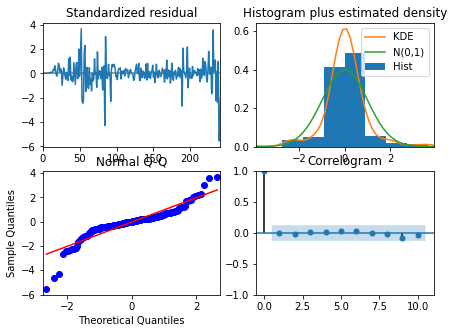

In [205]:
# Residual Diagnostics
case_model.plot_diagnostics(figsize=(7,5))
plt.show()

<ipython-input-185-5f04d630510d>:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


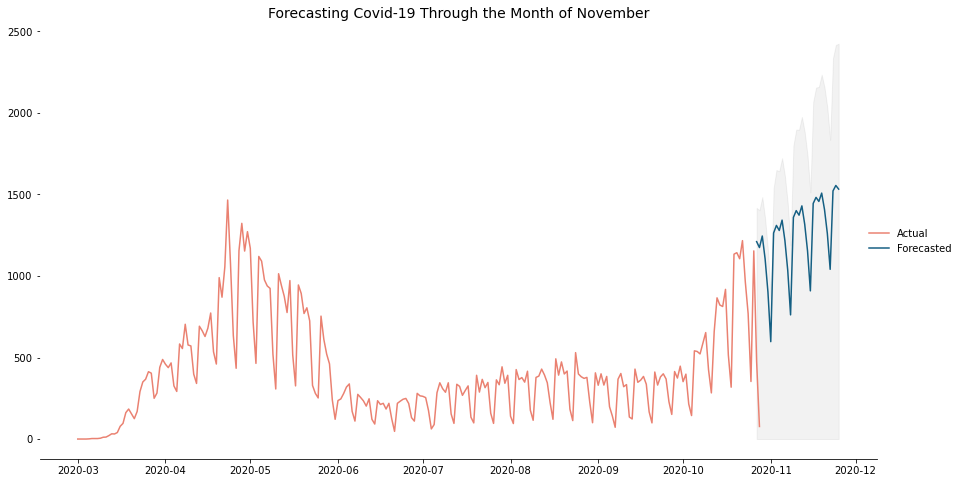

In [216]:
# Forecast
n_periods = 30
fin_fit, confint = case_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df['Cases - Total'].index[-3], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fin_fit, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

forecast_plot(vars_list =[df['Cases - Total'][:-1], fitted_series],
                          var_labels = ['Actual', 'Forecasted'],
                          title = 'Forecasting Covid-19 Through the Month of November',
                          dist=.8,
                          min=0)

In [211]:
forecast_accuracy(fin_fit, test.values)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 2.5637968491698246,
 'me': -1222.8135707994559,
 'mae': 1230.69280967561,
 'mpe': -2.527149226490038,
 'rmse': 1380.35730248631,
 'acf1': 0.6998100131395864,
 'corr': -0.41847611961744363,
 'minmax': 2.5572970307198513}

## Increasing seasonality period

In [214]:
# Seasonal - fit stepwise auto-ARIMA
case_model = pm.auto_arima(df['Cases - Total'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_d = 3, max_q=3, m=7,
                         max_P=3, max_D=3, max_Q=3,
                         start_P=0, seasonal=True,
                         d=None, D=None, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

case_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[21] intercept   : AIC=3149.658, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[21] intercept   : AIC=3252.703, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[21] intercept   : AIC=3151.859, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[21] intercept   : AIC=3161.698, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[21]             : AIC=3250.706, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[21] intercept   : AIC=3209.719, Time=0.09 sec
 ARIMA(1,1,1)(1,0,1)[21] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,1,1)(0,0,2)[21] intercept   : AIC=3144.400, Time=2.99 sec
 ARIMA(1,1,1)(1,0,2)[21] intercept   : AIC=inf, Time=4.29 sec
 ARIMA(1,1,1)(0,0,3)[21] intercept   : AIC=3138.691, Time=6.39 sec
 ARIMA(1,1,1)(1,0,3)[21] intercept   : AIC=inf, Time=9.17 sec
 ARIMA(0,1,1)(0,0,3)[21] intercept   : AIC=3146.997, Time=3.04 sec
 ARIMA(1,1,0)(0,0,3)[21] intercept   : AIC=3163.514, Time=3.57 sec
 ARIMA(2,1,1)(0,0,3)[21] intercept   : AIC=3135.821, Time=4.87 sec
 ARIMA(2,1,1)(0,0,2)[21] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  243
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 21)   Log Likelihood               -1548.902
Date:                            Tue, 03 Nov 2020   AIC                           3111.804
Time:                                    10:23:20   BIC                           3136.226
Sample:                                         0   HQIC                          3121.642
                                            - 243                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0214      0.568     -0.038      0.970      -1.135       1.092
ar.L1          0.1883      0.126      1.499      0.134      -0.058       0.434
ar.L2         -0.2006      0.052     -3.884      0.000      -0.302      -0.099
ma.L1         -0.5170      0.119     -4.362      0.000      -0.749      -0.285
ar.S.L21       0.9673      0.050     19.325      0.000       0.869       1.065
ma.S.L21      -0.7835      0.151     -5.184      0.000      -1.080      -0.487
sigma2      1.928e+04   1503.959     12.822      0.000    1.63e+04    2.22e+04
===================================================================================
Ljung-Box (Q):                      107.29   Jarque-Bera (JB):               155.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.29
Prob(H) (two-sided):                  0.57   Kurtosis:                         6.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting Cumulative Cases

In [83]:
print(df.shape)
df.head(3)

(243, 71)


,Cases - Total,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,Cases - Age 70-79,Cases - Age 80+,Cases - Age Unknown,Cases - Female,Cases - Male,Cases - Unknown Gender,Cases - Latinx,Cases - Asian Non-Latinx,Cases - Black Non-Latinx,Cases - White Non-Latinx,Cases - Other Race Non-Latinx,Cases - Unknown Race/Ethnicity,Deaths - Age 0-17,Deaths - Age 18-29,Deaths - Age 30-39,Deaths - Age 40-49,Deaths - Age 50-59,Deaths - Age 60-69,Deaths - Age 70-79,Deaths - Age 80+,Deaths - Age Unknown,Deaths - Female,Deaths - Male,Deaths - Unknown Gender,Deaths - Latinx,Deaths - Asian Non-Latinx,Deaths - Black Non-Latinx,Deaths - White Non-Latinx,Deaths - Other Race Non-Latinx,Deaths - Unknown Race/Ethnicity,Hospitalizations - Age 0-17,Hospitalizations - Age 18-29,Hospitalizations - Age 30-39,Hospitalizations - Age 40-49,Hospitalizations - Age 50-59,Hospitalizations - Age 60-69,Hospitalizations - Age 70-79,Hospitalizations - Age 80+,Hospitalizations - Age Unknown,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Unknown Gender,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity,cum_cases,0-17_cum_cases,18-29_cum_cases,30-39_cum_cases,40-49_cum_cases,50-59_cum_cases,60-69_cum_cases,70-79_cum_cases,Age 80+_cum_cases,Latinx_cum_cases,Asian_cum_cases,Black_cum_cases,White_cum_cases,Other_cum_cases
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-03,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
train = df.cum_cases[:213]
test = df.cum_cases[213:]

In [112]:
model_total = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

model_total.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=2748.873, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2788.871, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=2787.885, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=2767.972, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2786.892, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=2730.490, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=2757.896, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=2732.233, Time=0.20 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=2736.198, Time=0.21 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=2734.826, Time=0.20 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=2755.863, Time=0.05 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=2730.086, Time=0.45 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=2701.050, Time=0.52 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=2686.666, Time=0.44 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  213
Model:               SARIMAX(2, 2, 3)   Log Likelihood               -1333.287
Date:                Mon, 02 Nov 2020   AIC                           2678.575
Time:                        22:20:44   BIC                           2698.686
Sample:                             0   HQIC                          2686.704
                                - 213                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2464      0.024     52.776      0.000       1.200       1.293
ar.L2         -0.9612      0.021    -46.234      0.000      -1.002      -0.920
ma.L1         -1.8953      0.074    -25.760      0.000      -2.040      -1.751
ma.L2          1.6345      0.116     14.120      0.000       1.408       1.861
ma.L3         -0.5072      0.071     -7.128      0.000      -0.647      -0.368
sigma2      1.777e+04   1278.565     13.897      0.000    1.53e+04    2.03e+04
===================================================================================
Ljung-Box (Q):                      500.01   Jarque-Bera (JB):                40.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

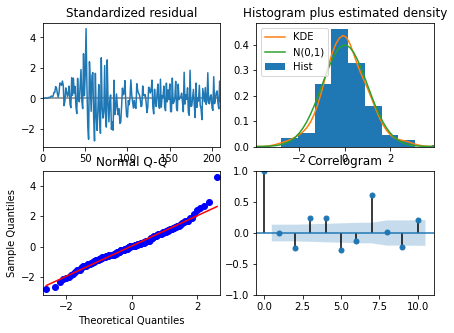

In [113]:
# Residual Diagnostics
model_total.plot_diagnostics(figsize=(7,5))
plt.show()

<ipython-input-76-821a44c8bd1e>:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


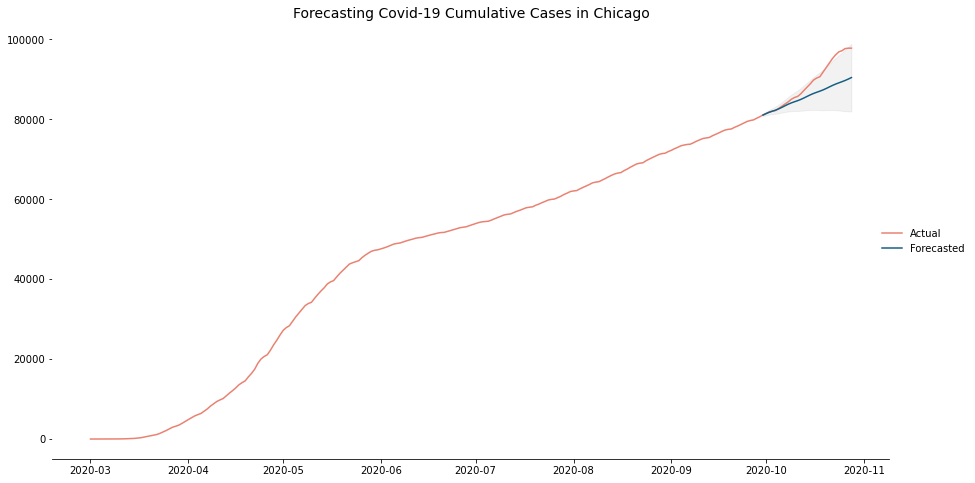

In [114]:
# Forecast
n_periods = 30
cum_fit, confint = model_total.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = test.index

# make series for plotting purpose
fitted_series = pd.Series(cum_fit, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

forecast_plot(vars_list =[df['cum_cases'][:-1], fitted_series],
                          var_labels = ['Actual', 'Forecasted'],
                          title = 'Forecasting Covid-19 Cumulative Cases in Chicago',
                          dist=.8)

In [122]:
forecast_accuracy(forecast = cum_fit, actual = test.values)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.03499964268847218,
 'me': -3289.3652532685937,
 'mae': 3296.801465267195,
 'mpe': -0.034909148564607057,
 'rmse': 4428.8004461937735,
 'acf1': 0.9428279995725773,
 'corr': 0.9909091994242691,
 'minmax': 0.03499958475162723}

In [105]:
cum_fit.shape

(30,)

In [106]:
test.shape

(30,)